# Welcome to SMuLe Talent Academy!

![img/logo.jpg](img/logo.jpg)

# Introduction

This course will run for 8 weeks. The first four weeks, we will embark on a journey through various aspects of the ML world. The remainder of the course will be spent on guided team projects where you will get to design a fully working application.

The syllabus is as follows:
    
1. Session 1: Interpretability & Debugging
2. Session 2: Recommender Systems
3. Session 3:  ~Neural Networks~ Audio Digital Signal Processing (Guest Lecture)
4. Session 4: Deployment
5. Sessions 5-8: Team project work

There will be one 60 minute session per week. Afterwards, we split into teams and get our hands dirty with project work. Every week we will have individual consultations with each team to check on progress and consult on next steps.

# Session 1: Intepretability & Debugging

Linear Models are the "hello world" of the ML world. They are very simple models which learns a feature weight $w_i$ for each input feature $x_i$ to predict a target value $y$.

For example, the equation for a **Linear Regression** is as follows: 

$$ y = \sum_iw_i*x_i + b$$

Similarly, for a **Logistic Regression** the equation is:

$$y = \sigma(\sum_iw_i*x_i + b)$$  $$\sigma(x) = \frac{1}{1+e^{-x}} $$

While simple, these models allow us to solve or at least get started with a lot of real world problems. However, a lot of things can go wrong. This session will try to look at ways we can interpret and debug linear models.

## Why Interpret?

Let's first take a step back and ask the question "Why?". Why do we need to interpret ML models? 

On the one hand, understanding how the model works and what it has learned allows us to reason and pinpoint the areas where it doesn't work. Modeling a real world process often involves a lot of simplification and relaxation of the assumptions that the clean mathematical formulation of models require. 

On the other hand, machine learning is becoming a bigger and bigger part of our daily lives. In the future, as it spreads, more and more people of different backgrounds will be using ML derived products to make critical decisions. It is our duty as Data Scientists/ML engineers to output only safe-to-use models along with tools to diagnose and manipulate how the machine reacts.

## Data 

For ML & Data Science, data comes first. This session we will be working with the used car sales dataset from cardekho: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho.

Please download it and extract it in the `./data/` folder.

In [17]:
import pandas as pd

In [18]:
data = pd.read_csv("data/Nasa.csv", usecols = [1,4])
# data['brand'] = data['name'].apply(lambda x: x.split(' ')[0])
# data['selling_price'] = data['selling_price'] * 0.014

data.head()

,TIME,T2M_
0,0,-5.84125
1,0,-3.54462
2,1,-2.18427
3,1,-0.30780
4,2,2.10742


In [19]:
data['T2M_'].describe()

count    962.000000
mean      10.636033
std        8.474326
min       -7.499150
25%        3.000220
50%       10.725150
75%       18.257675
max       27.786400
Name: T2M_, dtype: float64

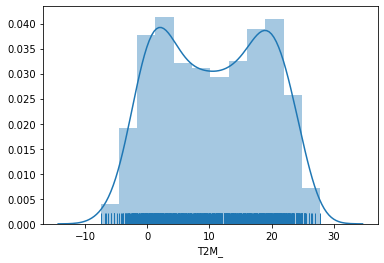

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.distplot(data['T2M_'],rug=True)

## Train-test split
In machine learning, one always needs to test his algorithm on unseen data.

In [21]:
from sklearn.model_selection import train_test_split

train, valid_test = train_test_split(data, test_size=0.2, random_state=42)
valid, test = train_test_split(valid_test, test_size=0.5, random_state=24)

len(train), len(valid), len(test)

(769, 96, 97)

In [22]:
valid.to_csv("data/valid.csv")
test.to_csv("data/test.csv")

In [23]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [24]:
# class YearTransformer(FunctionTransformer):
    
#     def __init__(self):
#         FunctionTransformer.__init__(self, self.years_since_manufacture)
#         self.feature_names = None

#     def years_since_manufacture(self, xs):
#         self.feature_names = xs.columns
#         return 2020 - xs 
    
#     def get_feature_names(self):
#         return self.feature_names

    
# class KMTransformer(FunctionTransformer):
    
#     def __init__(self):
#         FunctionTransformer.__init__(self, self.kms_thousands)
#         self.name = None
        
#     def kms_thousands(self, xs):
#         self.name = xs.columns
#         return xs / 1000
    
#     def get_feature_names(self):
#         return self.name
    
# class PriceTransformer(FunctionTransformer):
    
#     def __init__(self):
#         FunctionTransformer.__init__(self, self.price_thousands)
#         self.name = None
        
#     def price_thousands(self, xs):
#         self.name = xs.columns
#         return xs / 1000
    
# def get_feature_names(self):
#     return self.DATETIME

In [25]:
# transformer = ColumnTransformer([
# #     ('year_tf', YearTransformer() , ["year"]),
# #     ('km_driven_tf', KMTransformer(), ["km_driven"]),
# #     ('fuel', OneHotEncoder(drop="first",sparse=False), ['fuel']),
# #     ('seller_type', OneHotEncoder(drop="first",sparse=False), ['seller_type']),
# #     ('transmission', OneHotEncoder(drop="first",sparse=False), ['transmission']),
# #     ('owner', OneHotEncoder(drop="first",sparse=False), ['owner']),
# #     ('price_tf', PriceTransformer(), ['selling_price']),
# #     ('brand', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['brand'])
# ])
# transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [1,4])], remainder='passthrough')

In [26]:
# transformer.fit(train)

# # def extract_name(long_name):
# #     [transformer, DATETIME] = long_name.split("__")
# #     return DATETIME.replace('x0_', transformer+":")   
# DATES = [DATE for DATE in transformer.get_feature_names()]
# train_feats = pd.DataFrame(transformer.transform(train), columns=DATES)
# valid_feats = pd.DataFrame(transformer.transform(valid), columns=DATES)
train_feats = pd.DataFrame(train)
valid_feats = pd.DataFrame(valid)

# train_feats = pd.DataFrame(transformer.fit_transform(train), columns=data.columns)


## Weights Analysis & Weight Plot

In linear models, the ML algorithms learn a weight $w_i$ for each feature $x_i$. As data scientists, we can study these weights to reason about the model and what it has learned. 

This section will introduce techniques to analyze the weights learned by the ML model by using the `statsmodels` library.

In [27]:
from statsmodels.api import OLS

In [28]:
def get_xs_ys(df, y_col):
    xs = df.drop(columns=y_col)
    xs['bias'] = 1
    ys = df[y_col]
    return xs,ys

In [31]:
train_xs, train_ys = get_xs_ys(train_feats, 'T2M_')
valid_xs, valid_ys = get_xs_ys(valid_feats, 'T2M_')

In [32]:
ols = OLS(train_ys, train_xs, hasconst=True)
res = ols.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.004    
Dependent Variable: T2M_             AIC:                5467.4354
Date:               2020-09-15 11:17 BIC:                5476.7255
No. Observations:   769              Log-Likelihood:     -2731.7  
Df Model:           1                F-statistic:        3.851    
Df Residuals:       767              Prob (F-statistic): 0.0501   
R-squared:          0.005            Scale:              71.473   
---------------------------------------------------------------------
        Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
---------------------------------------------------------------------
TIME    0.0043      0.0022     1.9624    0.0501    -0.0000     0.0086
bias    9.5852      0.6040    15.8693    0.0000     8.3995    10.7709
------------------------------------------------------------------
Omnibus:              733.667       Durbin-Watson:          1.981 
Prob(Omnibus):        0.000         Jarque-Bera (JB):       49.095
Skew:                 0.020         Prob(JB):               0.000 
Kurtosis:             1.763         Condition No.:          549   
==================================================================

"""

In [33]:
def rmse(preds, targets):
    return ((preds - targets) ** 2).mean()**0.5

In [34]:
rmse(res.predict(valid_xs), valid_ys)

8.859887324449096

In [35]:
from talent_academy.linear_models.interpretability import weight_plot, effect_plot, effect_plot_for_example

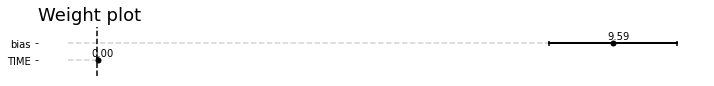

In [36]:
weight_plot(res)

## Effect plot

In [37]:
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import RegressionResultsWrapper


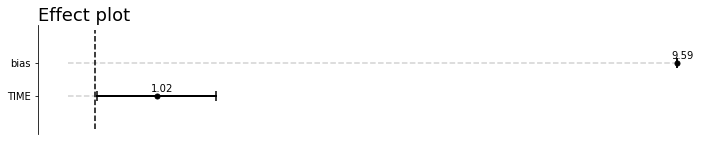

In [38]:
ax, _ = effect_plot(res, train_xs)

In [39]:
((res.predict(valid_xs) - valid_ys)**2).argsort()

486    60
60     32
717    54
380     0
705     8
       ..
33     35
599     6
650    65
603    56
535    20
Length: 96, dtype: int64

A very nice property of the effect plot is that it is **naturally contrastive**. For a given example, we can visualize what features could have been changed in order to nudge the outcome one way or another.

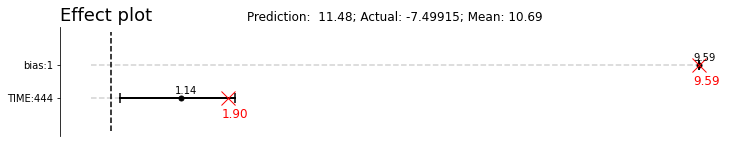

In [42]:
idx = 20
effect_plot_for_example(res, valid_xs, valid_xs.iloc[idx], valid_ys.iloc[idx])

## Decision Tree Regressor

Another inherently interpretable model is the **decision tree**.

In [43]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(train_xs, train_ys)

rmse(reg.predict(valid_xs), valid_ys)

8.81056871101324

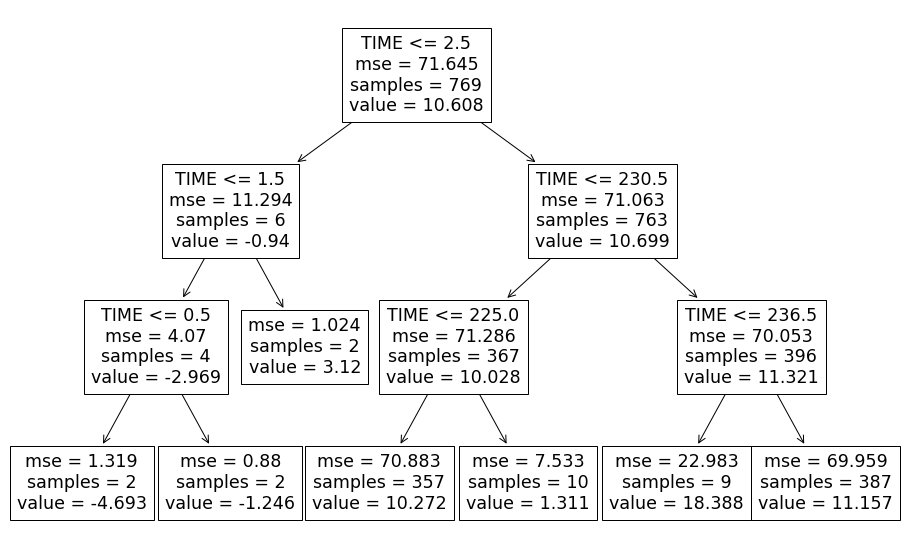

In [44]:
_, ax = plt.subplots(figsize=(16,10))
plot_tree(reg, ax= ax,feature_names=train_xs.columns);

## Other interpretable methods

A few notable interpretable methods are the following:

1. Naive Bayes Classifier - we can interpret the probabilities.
2. Decision Rules
3. k-nearest neighbours

## Homework

The homework for next week would be to try out some of these techniques on a dataset of your choice. Please be creative and apply them to something novel that intrigues you - do not default to Iris or Titanic.

Please send me your findings what features are most important in your dataset and we will review some of them briefly next week.


P.S. If you have trouble finding a dataset, shoot me an email and I can send you some inspiring stuff. But please try doing it on your own first.

## Further Reading

To learn more about intepretability of linear models and extensions, please check out chapter 4 of the [Interpretable Machine Learning book](https://christophm.github.io/interpretable-ml-book/simple.html). I highly recommend reading the entire book.
